# Визуализация

# Matplotlib

Это основная библиотека для визуализации данных в Python, на которой строятся другие библиотеки визуализации (пример: Seaborn). Она предоставляет широкий набор функций для создания графиков различных типов, включая линейные, столбчатые, гистограммы, диаграммы рассеяния и многие другие. 

Matplotlib также предоставляет функции для настройки свойств графика, таких как заголовки, легенды, оси и цветовые схемы.

In [2]:
# !pip install -U matplotlib

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
primer = [0, 1, 2]
primer_2 = [*range(10)]
df = pd.DataFrame({'nums_1': np.random.normal(100, 20, 200)})

df['nums_2'] = np.random.normal(50, 20, 200)
last_day = datetime.strptime('2022-11-11', '%Y-%m-%d')
first_day = str(last_day - timedelta(days=199))
df['date'] = pd.date_range(first_day, last_day)

df['grade'] = df.nums_1.apply(lambda x: 0 if x<95 else (2 if x>105 else 1))

df['multi'] = np.random.choice(primer_2, 200)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   nums_1  200 non-null    float64       
 1   nums_2  200 non-null    float64       
 2   date    200 non-null    datetime64[ns]
 3   grade   200 non-null    int64         
 4   multi   200 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 7.2 KB


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
nums_1,200.0,99.296195,49.484094,83.618219,101.434937,113.596696,150.090931,21.969018
nums_2,200.0,47.370044,-0.279904,34.469138,46.03705,60.389094,94.98691,17.908675
date,200,2022-08-03 12:00:00,2022-04-26 00:00:00,2022-06-14 18:00:00,2022-08-03 12:00:00,2022-09-22 06:00:00,2022-11-11 00:00:00,NaN
grade,200.0,1.05,0.0,0.0,1.0,2.0,2.0,0.906426
multi,200.0,4.385,0.0,2.0,4.0,7.0,9.0,2.75768


## С чего мы начнем?

1. Узнаем как строить базовые графики - через два вида манипуляции с объектом figure
2. Как построить несколько графиков на одной картинке
3. Все основные типы графиков, с которыми работает DS
4. Так же через seaborn
5. Дополнительные графики через seaborn
6. Pairplot
7. Хитрость для быстроты

### Базовые графики и построения

У `matplotlib` объектно-ориентированный интерфейс, который предоставляет полный контроль над свойствами графика

`Matplotlib` отображает ваши данные на `Figure` (например, окнах, виджетах Jupyter и т.д.), каждая из которых может содержать одну или несколько `Axes`, область, где точки могут быть заданы в терминах координат `x-y` (или `x-y-z` в 3D графике и т.д.)

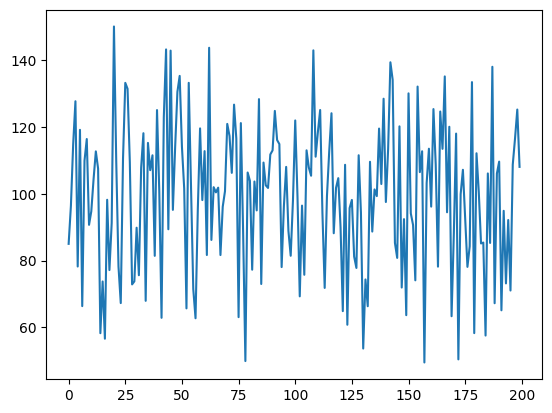

In [7]:
plt.plot(df.index, df.nums_1);

Основные объекты графиков указаны на рисунке:

<img src="attachment:a7392cac-ee72-4507-9b1c-91f31b84df64.png" width="600" height="600" />

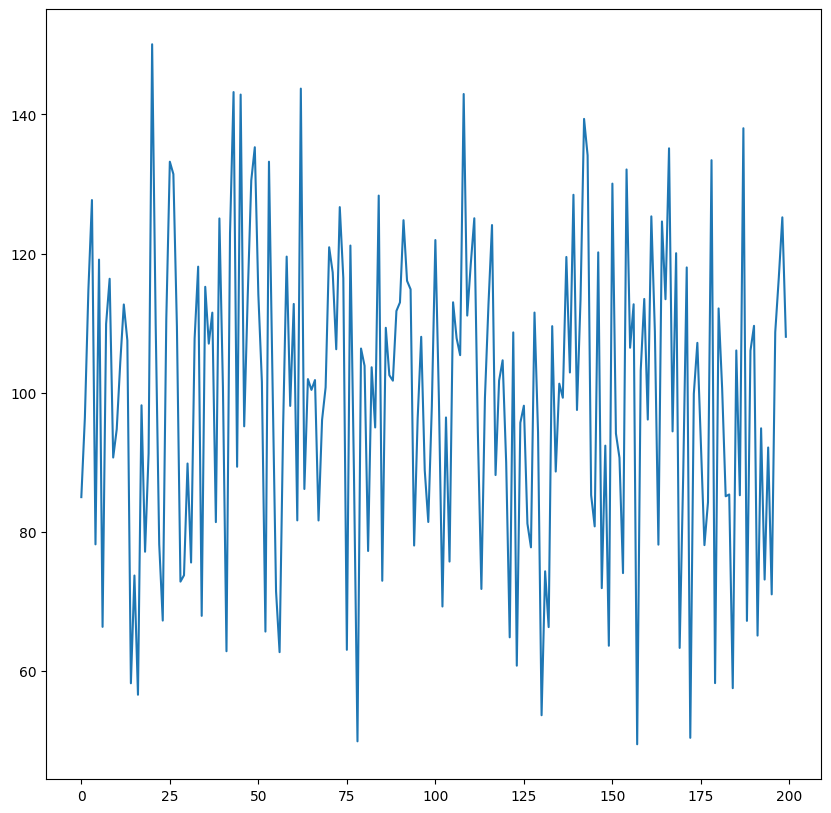

In [8]:
plt.figure(figsize=(10,10))
plt.plot(df.index, df.nums_1)
plt.show()

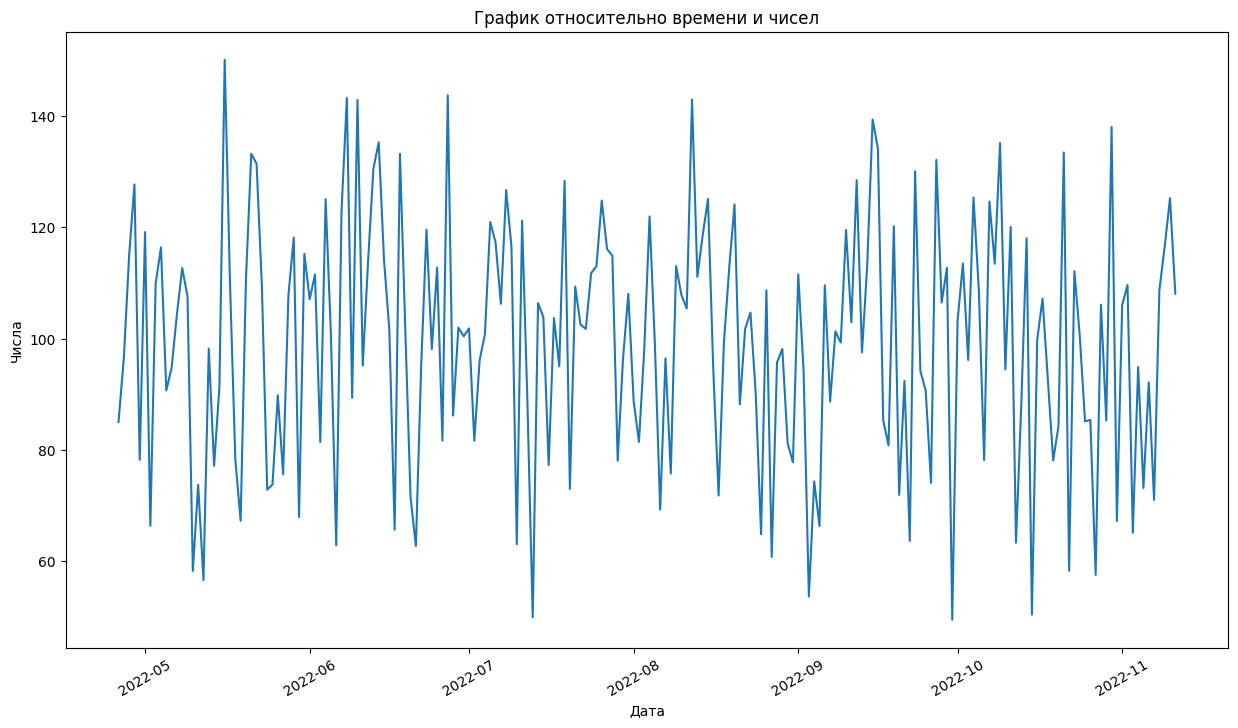

In [9]:
plt.figure(figsize=(15,8))
plt.title('График относительно времени и чисел')
plt.plot(df.date, df.nums_1)
plt.xlabel('Дата')
plt.ylabel('Числа')
plt.xticks(rotation=30)
plt.show()

Есть два основных способа вывода графиков:

1. Через `plt.figure` с его настройками (Полагаться на pyplot для неявного создания и управления фигурами и осями)

```python
x = np.linspace(0, 2, 100)  #  Данные.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
```

2. Через `fig, ax = plt.subplots` тоже с настройками (Явно создавать фигуры и оси и вызывать методы для них)

```python
x = np.linspace(0, 2, 100)  #  Данные.

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained') # создание рисунка
ax.plot(x, x, label='linear')  # нарисуем график
ax.plot(x, x**2, label='quadratic')  # еще график
ax.plot(x, x**3, label='cubic')  # и еще
ax.set_xlabel('x label')  # описание x-оси
ax.set_ylabel('y label')  # описание y-оси
ax.set_title("Simple Plot")  # Титул - название
ax.legend()  # Добавить легенду
```

Основных преимуществ и различий нет, оба метода по своему хороши.

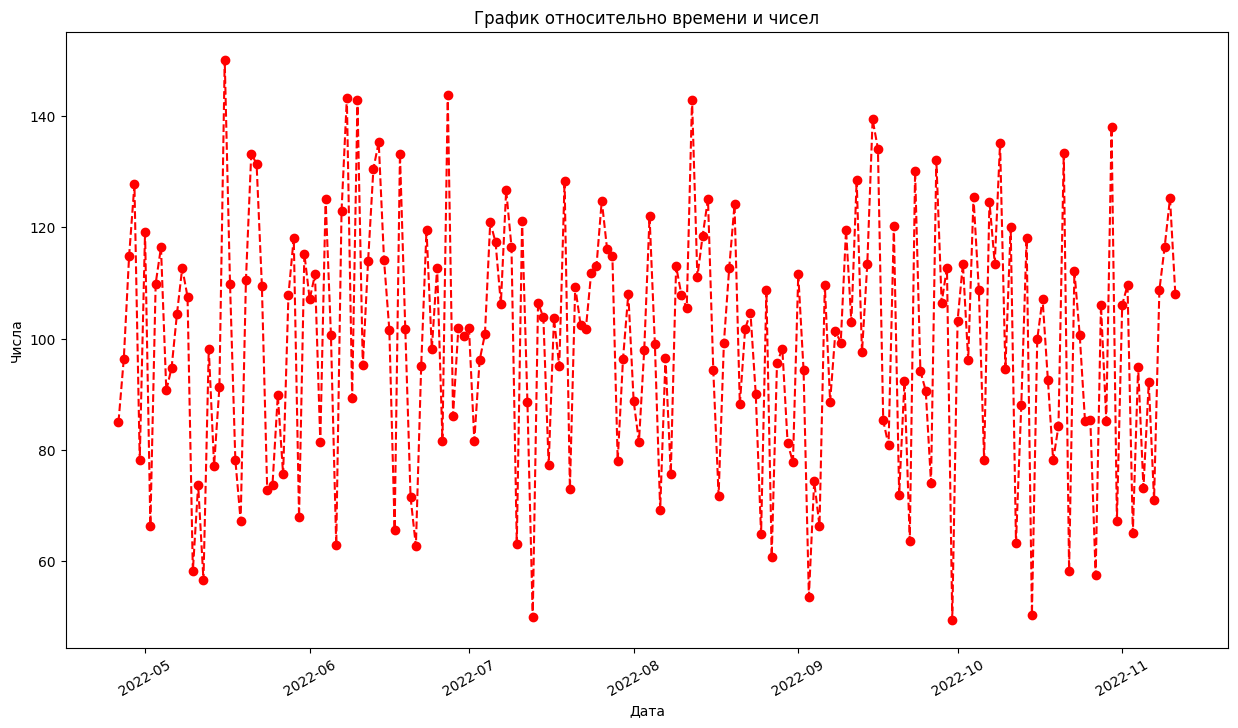

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('График относительно времени и чисел',)
ax.plot(df.date, df.nums_1, 'ro--')
ax.set_xlabel('Дата')
ax.set_ylabel('Числа')
ax.tick_params(axis='x', rotation=30)

Основные популярные способы настроек графиков:

|Название|Описание|
|---|---|
|color|цвет линии или точек|
alpha|прозрачность объекта (от 0 до 1)
linewidth|толщина линии графика
linestyle|стиль линии (сплошная, пунктирная, штрихпунктирная и т.д.)
marker|тип маркеров (точки, квадраты, крестики и т.д.)
markersize|размер маркеров
markeredgecolor|цвет границы маркеров
markerfacecolor|цвет заливки маркеров

Где смотреть? Документация!
https://matplotlib.org/stable/index.html

### А если несколько графиков?

Два варианта:

1. `plt.subplot()`
2. `fig, ax = plt.subplots()`

#### 1 вариант

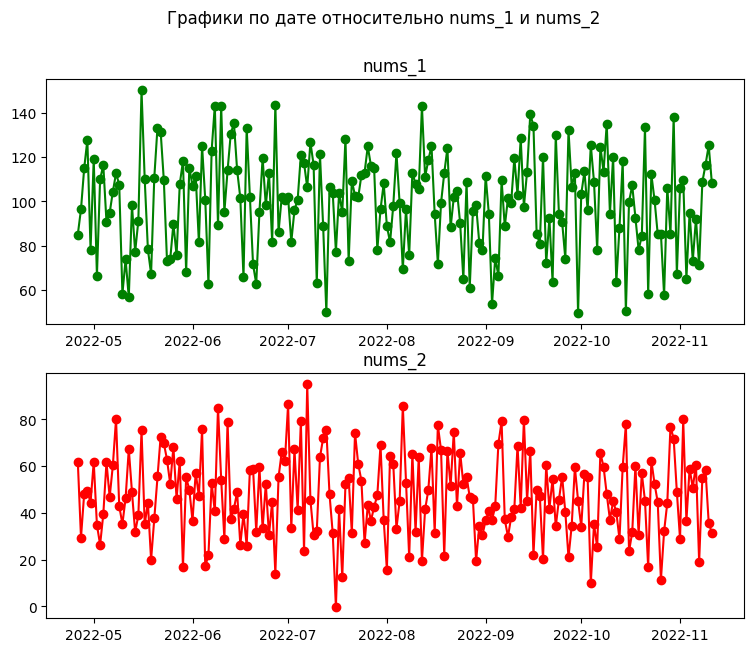

In [11]:
plt.figure(figsize=(9, 7))
plt.suptitle('Графики по дате относительно nums_1 и nums_2')

plt.subplot(211)
plt.plot(df.date, df.nums_1, color='green', marker='o')
plt.title('nums_1')

plt.subplot(212)
plt.plot(df.date, df.nums_2, color='red', marker='o')
plt.title('nums_2')

plt.show()

#### 2 вариант

[<Axes: > <Axes: >]


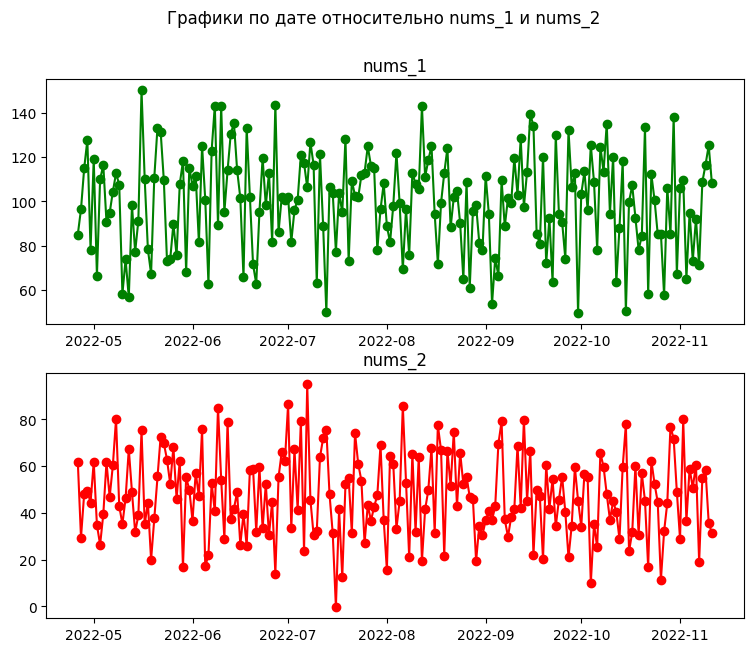

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(9, 7))
fig.suptitle('Графики по дате относительно nums_1 и nums_2')
print(ax)

ax[0].plot(df.date, df.nums_1, color='green', marker='o')
ax[0].set_title('nums_1')

ax[1].plot(df.date, df.nums_2, color='red', marker='o')
ax[1].set_title('nums_2');

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


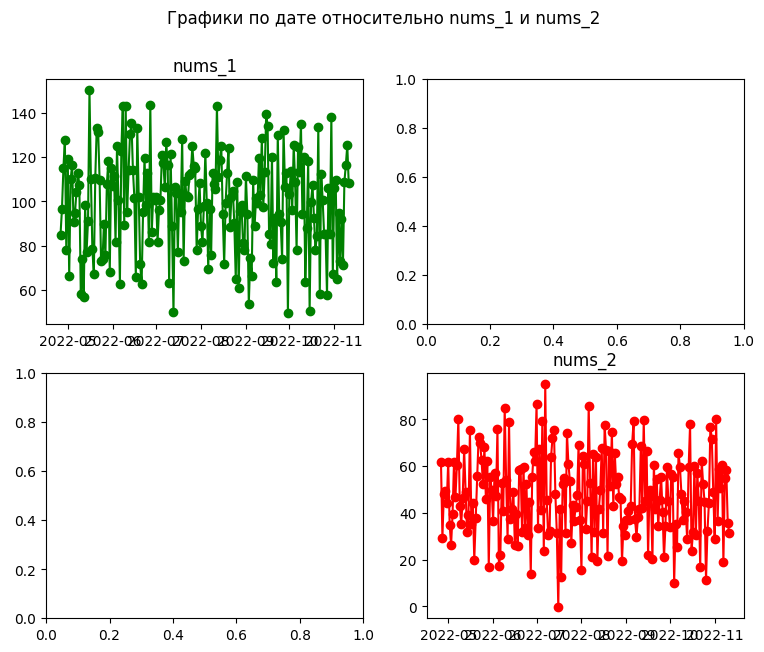

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(9, 7))
fig.suptitle('Графики по дате относительно nums_1 и nums_2')
print(ax)

ax[0, 0].plot(df.date, df.nums_1, color='green', marker='o')
ax[0, 0].set_title('nums_1')

ax[1, 1].plot(df.date, df.nums_2, color='red', marker='o')
ax[1, 1].set_title('nums_2');

## Основные типы графиков

|Название|Описание|
|---|---|
|Scatterplot|точечная диаграмма|
Line plot|линейный график
Bar chart|столбчатая диаграмма
Histogram|гистограмма
Box plot|ящик с усами (диаграмма рассеивания)
Heat map|тепловая карта
Pie|Круговая диаграмма

#### Scatterplot

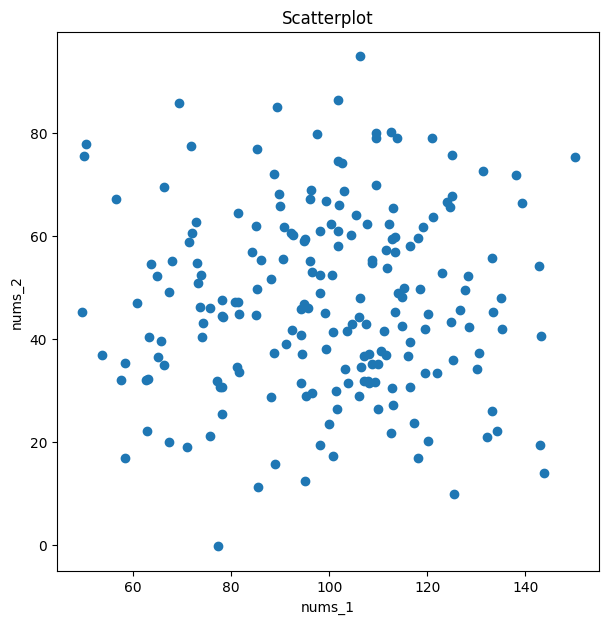

In [14]:
plt.figure(figsize=(7,7))
plt.title('Scatterplot')
plt.scatter(df.nums_1, df.nums_2)
plt.xlabel('nums_1')
plt.ylabel('nums_2')
plt.show()

#### Histogram

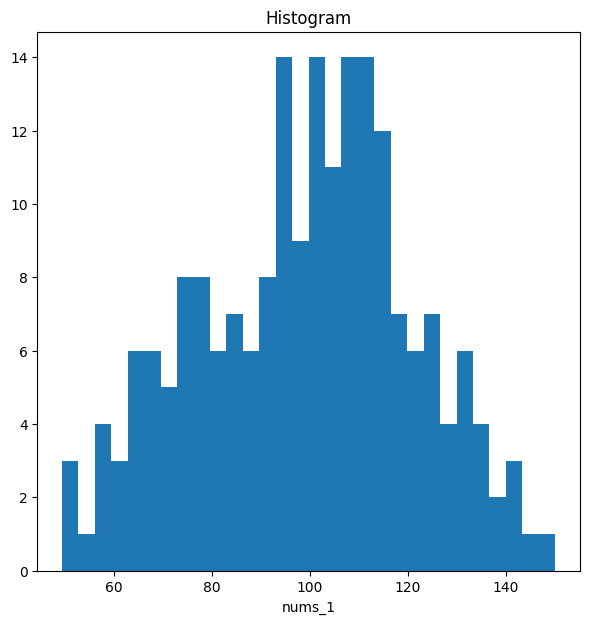

In [15]:
plt.figure(figsize=(7,7))
plt.title('Histogram')
plt.hist(df.nums_1, bins=30)
plt.xlabel('nums_1')
plt.show()

#### Lineplot

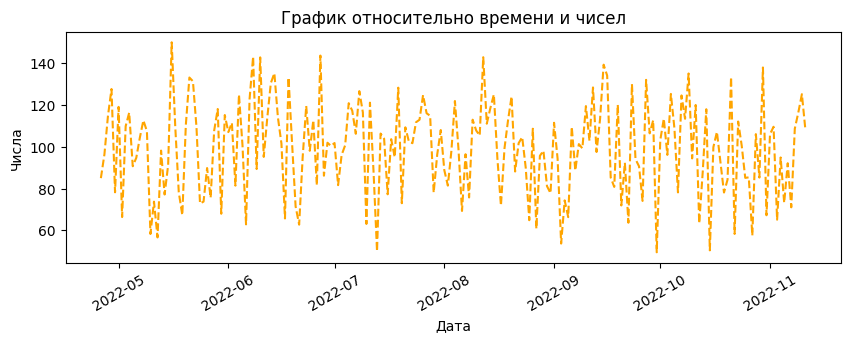

In [16]:
plt.figure(figsize=(10,3))
plt.title('График относительно времени и чисел')
plt.plot(df.date, df.nums_1, '--', color='orange')
plt.xlabel('Дата')
plt.ylabel('Числа')
plt.xticks(rotation=30)
plt.show()

#### Bar

In [17]:
tmp = df['grade'].value_counts()

In [18]:
tmp

grade
2    87
0    77
1    36
Name: count, dtype: int64

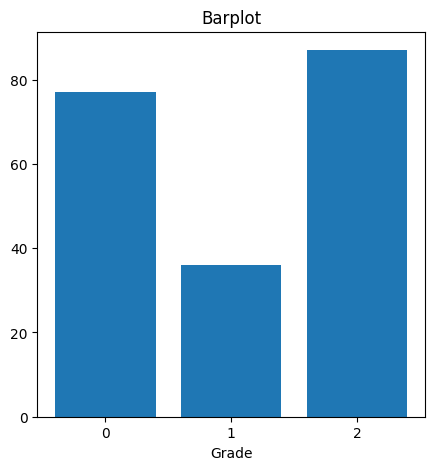

In [19]:
plt.figure(figsize=(5,5))
plt.title('Barplot')
plt.bar(tmp.index, height=tmp.values)
plt.xlabel('Grade')
plt.xticks(tmp.index)
plt.show()

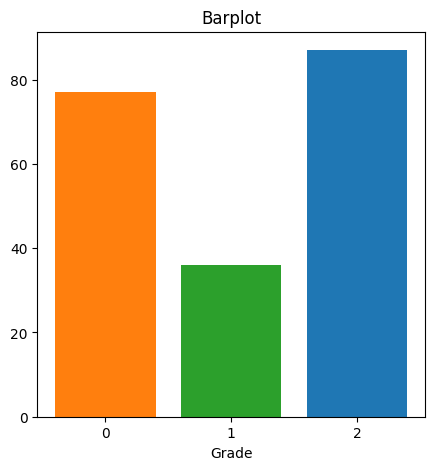

In [20]:
fig, ax = plt.subplots(figsize=(5,5))

for name in tmp.index:
    ax.bar(name, tmp[name])

ax.set_title('Barplot')
ax.set_xlabel('Grade')
ax.set_xticks(tmp.index)

plt.show()

#### Boxplot

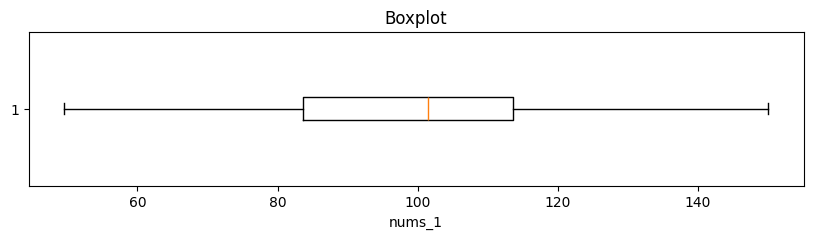

In [21]:
plt.figure(figsize=(10,2))
plt.title('Boxplot')
plt.boxplot(df.nums_1, vert=False)
plt.xlabel('nums_1')
plt.show()

#### Heatmap

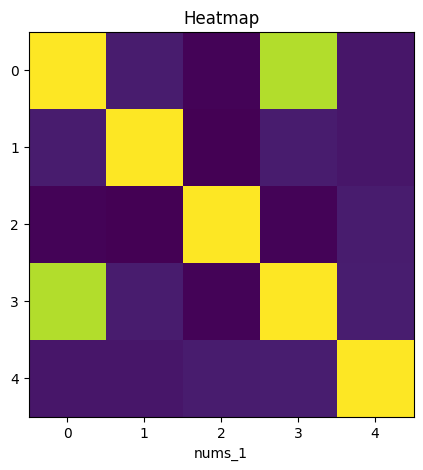

In [22]:
tmp = df.corr()

plt.figure(figsize=(5,5))
plt.title('Heatmap')
plt.imshow(tmp)
plt.xlabel('nums_1')
plt.show()

#### Pie

In [23]:
tmp = df['multi'].value_counts()
tmp

multi
7    27
4    26
1    26
6    24
2    20
5    17
9    17
3    16
0    16
8    11
Name: count, dtype: int64

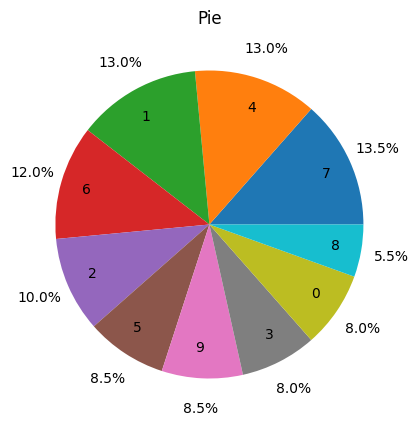

In [24]:
plt.figure(figsize=(5,5))
plt.title('Pie')
plt.pie(tmp, labels=tmp.index, autopct='%1.1f%%', pctdistance=1.2, labeldistance=0.8)
plt.show()

## Seaborn

`Seaborn` — это библиотека, которая работает поверх `Matplotlib` и добавляет много новых функций и возможностей для создания красивых и информативных графиков. Она имеет собственные функции для создания таких графиков, как тепловые карты, диаграммы распределения и другие. Seaborn упрощает создание сложных графиков и улучшает их эстетический вид по сравнению с` Matplotlib`. Также в `Seaborn` есть возможность создания статистических графиков, где значения считаются автоматически внутри метода (kdeplot и подобные).

In [25]:
# !pip install -U seaborn

In [26]:
import seaborn as sns
sns.set_theme()

#### Scatterplot

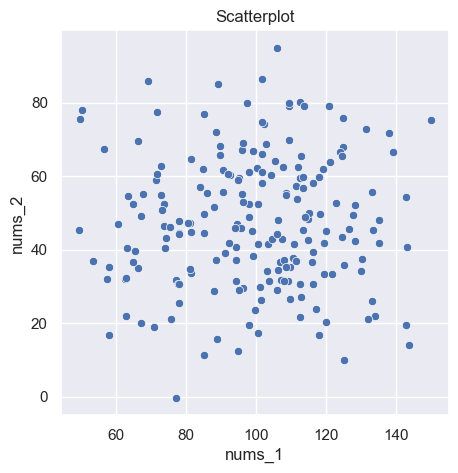

In [27]:
plt.figure(figsize=(5,5))
plt.title('Scatterplot')
sns.scatterplot(x=df.nums_1, y=df.nums_2)
plt.xlabel('nums_1')
plt.ylabel('nums_2')
plt.show()

#### Histogram

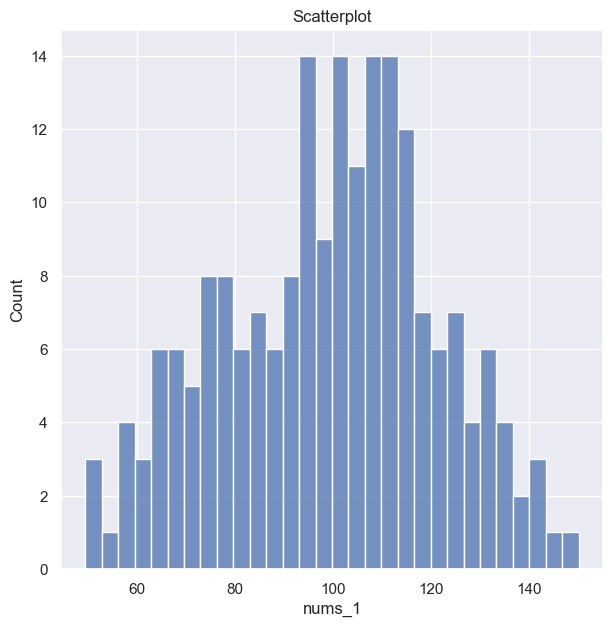

In [28]:
plt.figure(figsize=(7,7))
plt.title('Scatterplot')
sns.histplot(df.nums_1, bins=30)
plt.xlabel('nums_1')
plt.show()

#### Lineplot

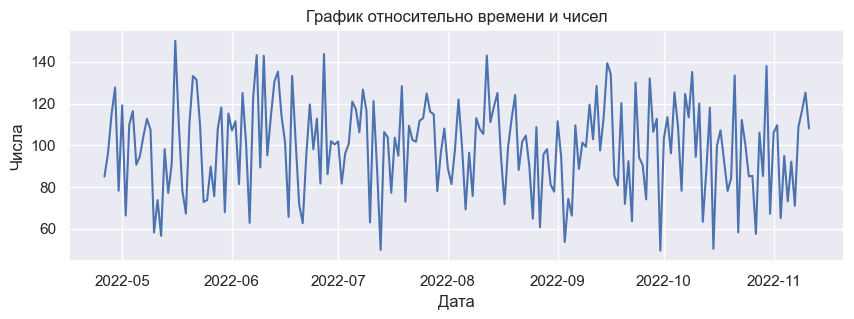

In [29]:
plt.figure(figsize=(10,3))
plt.title('График относительно времени и чисел')
sns.lineplot(x=df.date, y=df.nums_1)
plt.xlabel('Дата')
plt.ylabel('Числа')
plt.show()

#### Bar

In [30]:
tmp = df['grade'].value_counts()

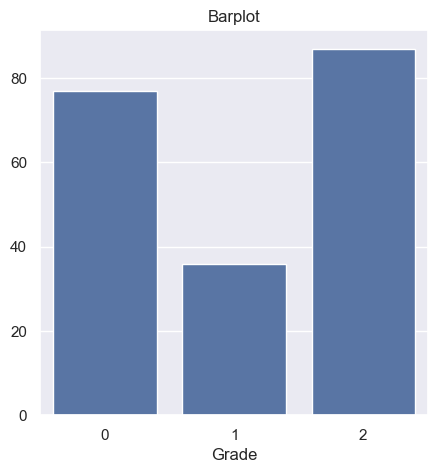

In [31]:
plt.figure(figsize=(5,5))
plt.title('Barplot')
sns.barplot(x=tmp.index, y=tmp.values)
plt.xlabel('Grade')
plt.xticks(tmp.index)
plt.show()

#### Boxplot

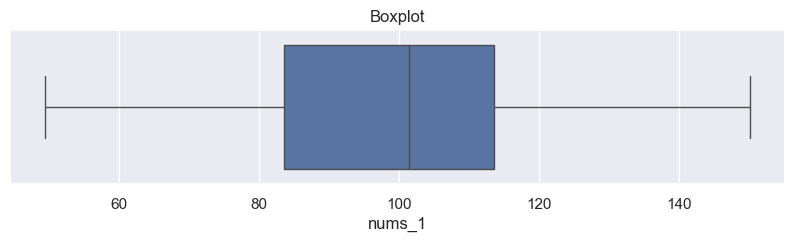

In [32]:
plt.figure(figsize=(10,2))
plt.title('Boxplot')
sns.boxplot(df.nums_1, orient='h')
plt.xlabel('nums_1')
plt.show()

#### Heatmap

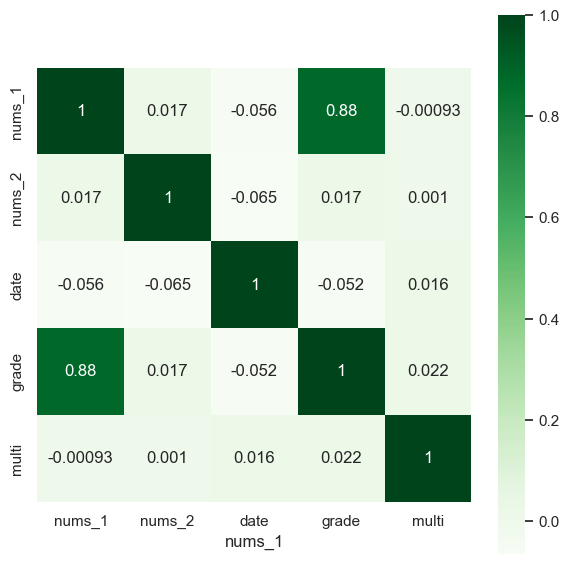

In [33]:
tmp = df.corr()

plt.figure(figsize=(7,7))
sns.heatmap(tmp, annot=True, cmap='Greens')
plt.imshow(tmp)
plt.xlabel('nums_1')
plt.show()

### Kdeplot + Displot

Ядерная оценка плотности (ЯОП, англ. Kernel Density Estimation, KDE) — это непараметрический способ оценки плотности случайной величины.  Это метод визуализации распределения наблюдений в наборе данных, аналогичный гистограмме. KDE представляет данные с помощью непрерывной кривой плотности вероятности в одном или нескольких измерениях.

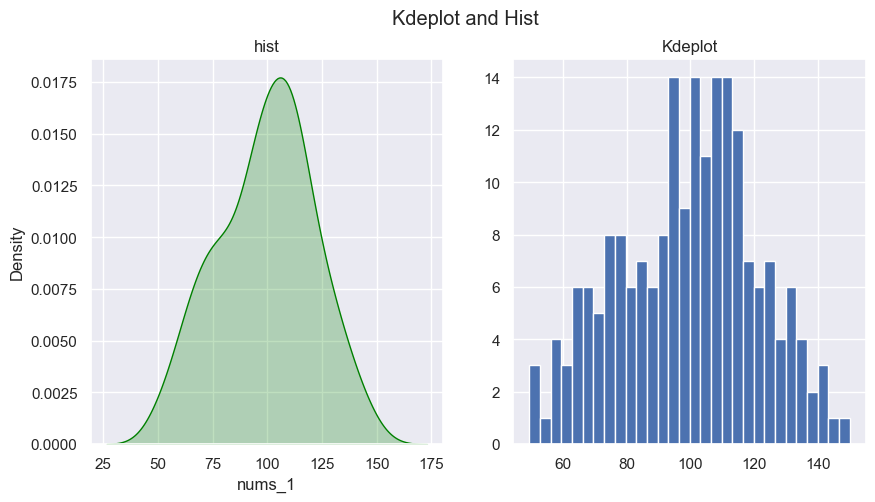

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Kdeplot and Hist')

sns.kdeplot(df.nums_1, ax=ax[0], color='green', fill='green')
ax[0].set_title('hist')

ax[1].hist(df.nums_1, bins=30)
ax[1].set_title('Kdeplot');

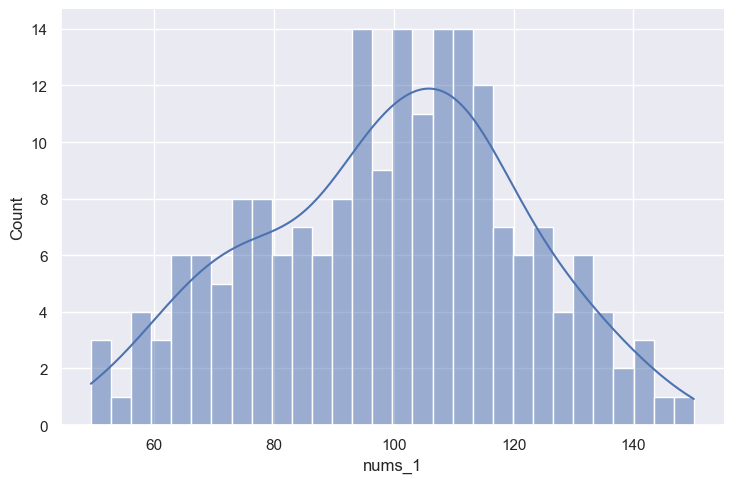

In [35]:
sns.displot(df, x='nums_1', kde=True, bins=30, aspect=1.5); #4/3 ratio

#### Relplot

Ключевое отличие между `relplot` и `lineplot` заключается в том, что `lineplot` позволяет построить линии на основе одной переменной, в то время как `relplot` может построить линии как от двух переменных, так и от одной переменной с использованием дополнительной информации для группировки.

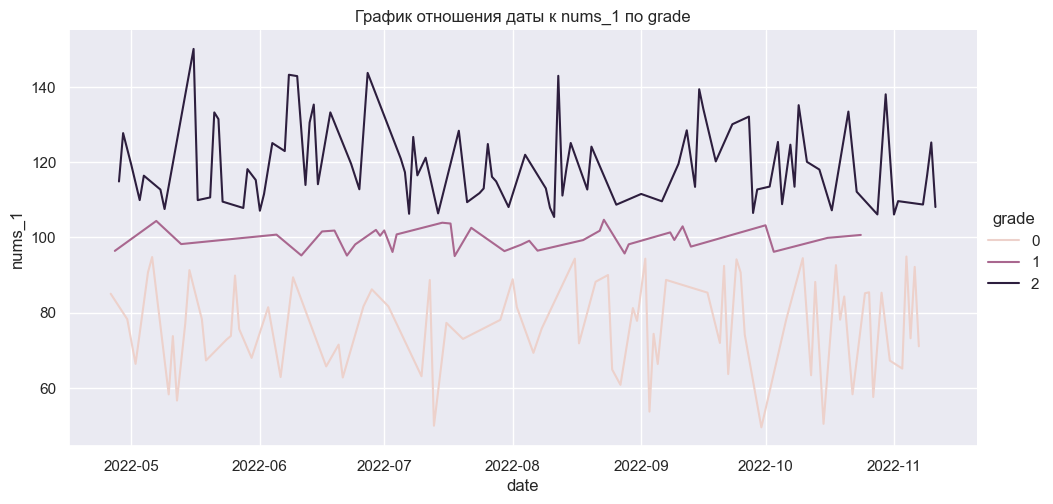

In [36]:
sns.relplot(
    data=df,
    x="date",
    y="nums_1",
    kind="line",
    hue="grade",
    aspect=2,
)
plt.title('График отношения даты к nums_1 по grade')
plt.show()

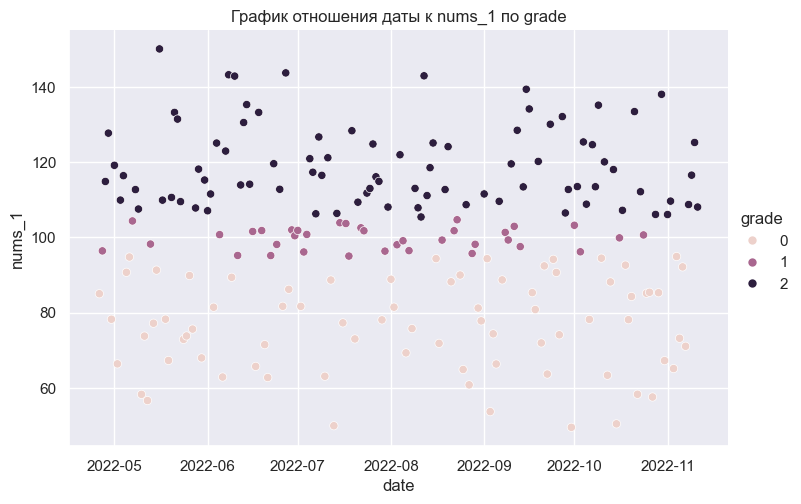

In [37]:
sns.relplot(
    data=df,
    x="date",
    y="nums_1",
    kind="scatter",
    hue="grade",
    aspect=1.5,
)
plt.title('График отношения даты к nums_1 по grade')
plt.show()

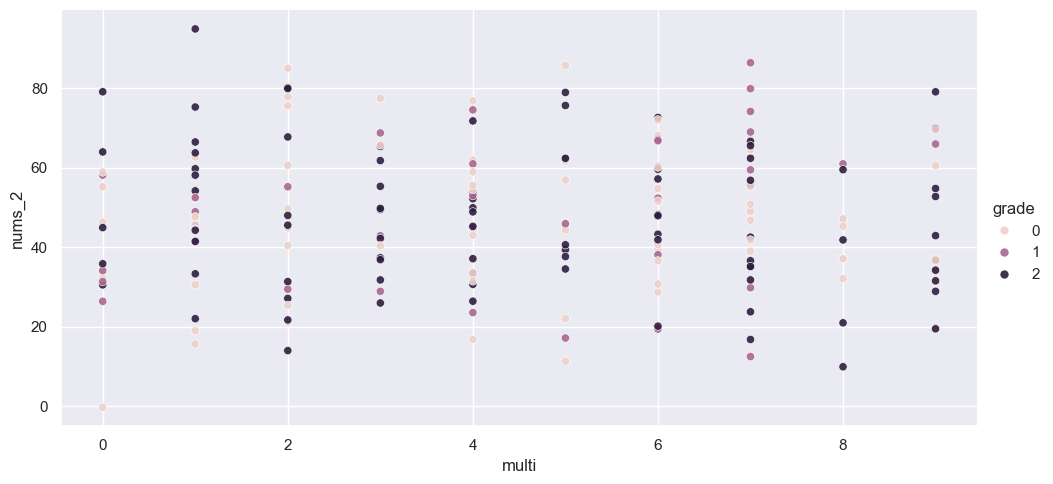

In [38]:
sns.relplot(
    data=df,
    x="multi",
    y="nums_2",
    hue="grade",
    kind="scatter",
    aspect=2,
    alpha=0.9,
);

## Pairplot/Scatter matrix

`Pairplot` и такие методы как `scatter matrix` позволяет рассмотреть данные более быстро. Это удобно, если нужен быстрый анализ.

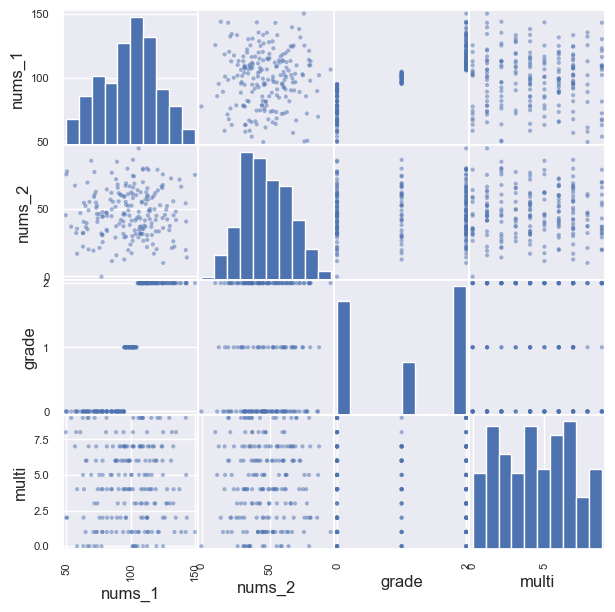

In [39]:
pd.plotting.scatter_matrix(df, figsize=(7,7));

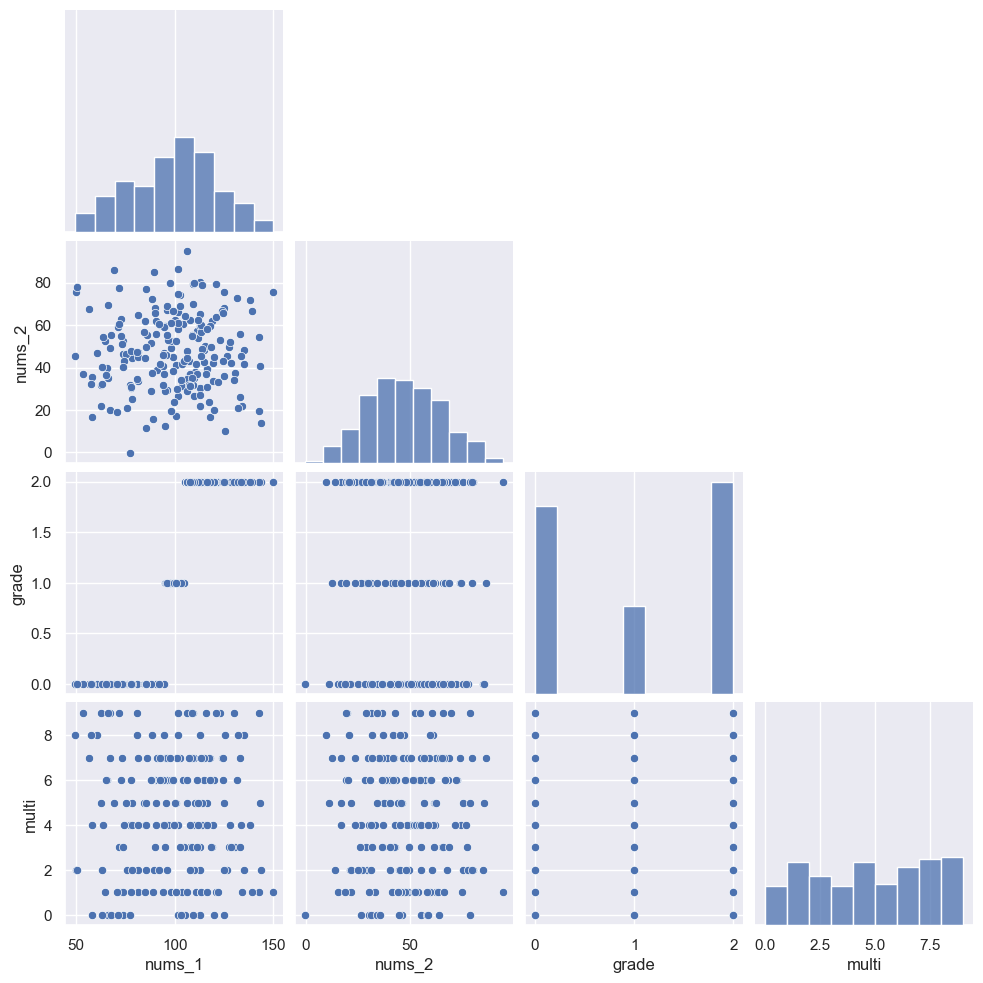

In [40]:
sns.pairplot(df, corner=True);

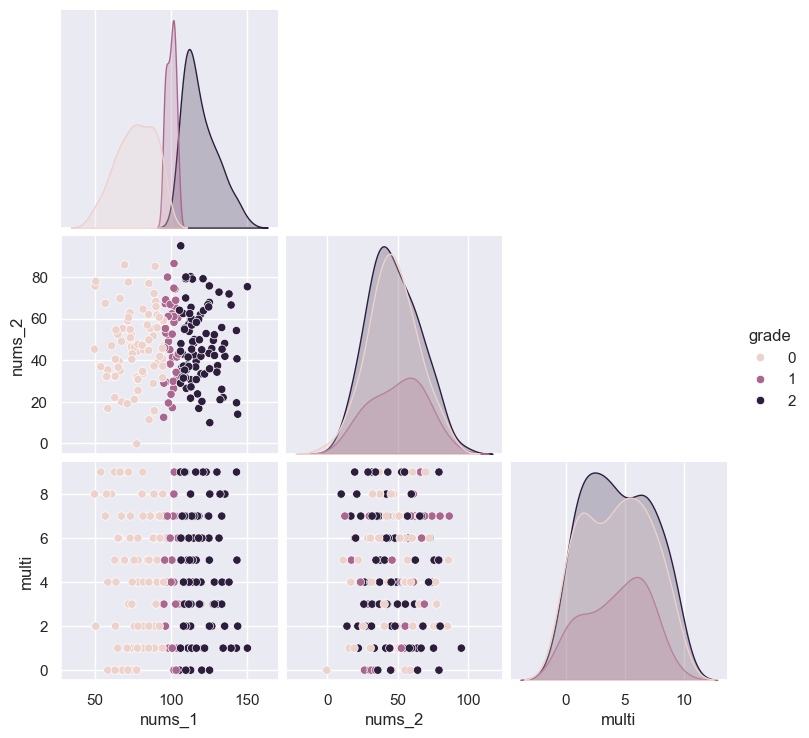

In [41]:
sns.pairplot(df, corner=True, hue='grade');

### Хитрости для ускорения

Нет времени мучаться? `Pandas` всему голова!

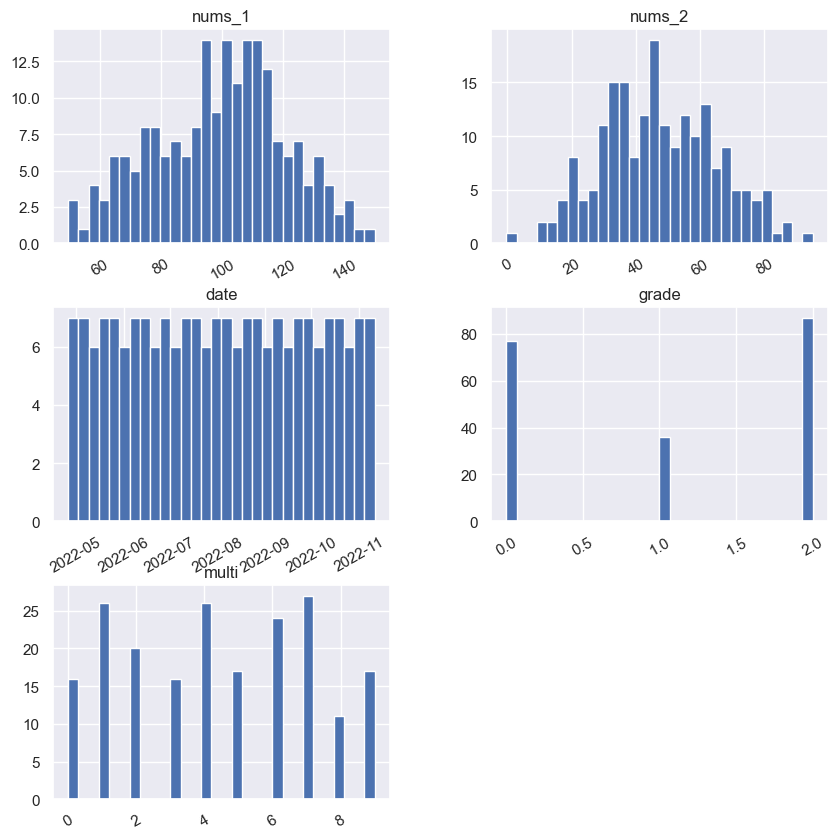

In [42]:
df.hist(figsize=(10, 10), layout=(3, -1), bins=30, xrot=30);

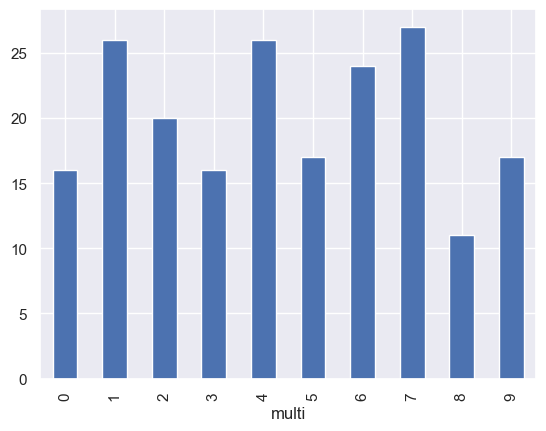

In [43]:
df.groupby('multi')['grade'].count().plot.bar();

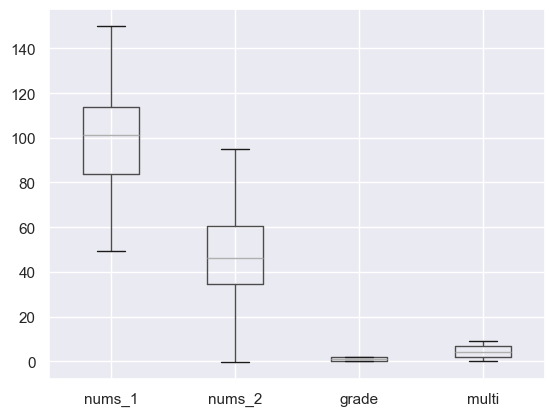

In [44]:
df.boxplot();

<Axes: >

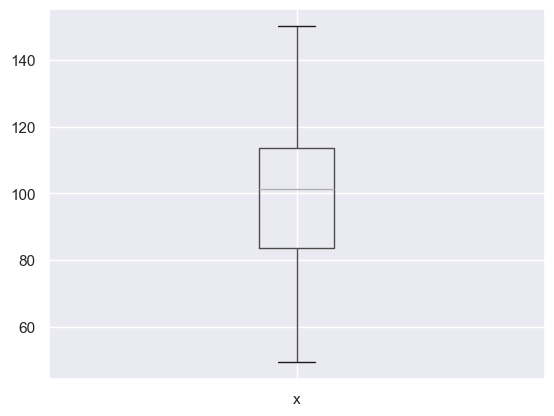

In [45]:
pd.plotting.boxplot(df.nums_1)